# Linear Regression Part 2


In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rc('font', size=16)
matplotlib.style.use('ggplot')

In [2]:
# Let's look at the `cars` data set again.
import os
filename = 'cars_multivariate.csv'
path = os.path.join('.','data')

filepath = os.path.join(path, filename)
cars = pd.read_csv(filepath)
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model         398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [3]:
cars.describe()

,mpg,cylinders,displacement,weight,acceleration,model,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


## Linear Regression

What is it? We are hypothesizing a **linear relationship** between a *target* (or 'endogenous' variable) and some *features* (predictors, or 'exogenous' variables).

In the case of a **single** feature, we are looking to quantify the relationship to the target of the form:
$\hat{y}_i = \beta_0 + \beta_1 x_i$ 


In the case of a **multiple** features, we are looking to quantify the relationship to the target of the form:
$\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \ldots + \beta_p x_p$


If we have `p` features, then will will have `p+1` beta coefficients incuding the intercept term. 

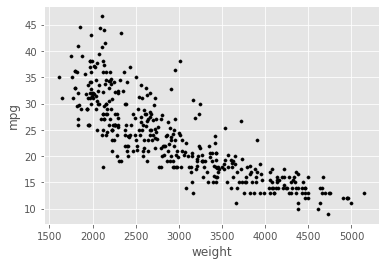

In [4]:
# Simple - 2D plot - One Feature and One Target

y = cars['mpg']
X = cars['weight']

fig, ax = plt.subplots()
ax.scatter(X,y, color='k', s=10)
ax.set_xlabel('weight')
ax.set_ylabel('mpg');

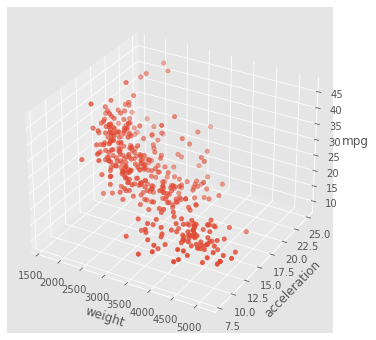

In [5]:
# 3D Plot - Two Features (weight and acceleration) and One Target (mpg)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
%matplotlib inline
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cars['weight'], cars['acceleration'], cars['mpg'])
ax.set_zlabel('mpg')
ax.set_xlabel('weight')
ax.set_ylabel('acceleration');

There are lots of lines we could draw... how do we pick a "best" line?
Well, we know there is a `LinearRegression` class in `sklearn.linear_model` that we can use. But what does that `do`, exactly? How does it decide which line is `best`?

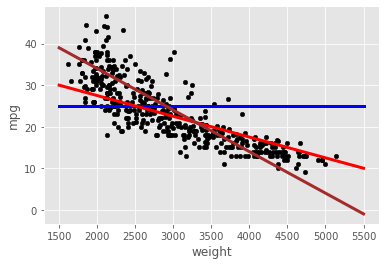

In [6]:
# Pick a line, any line

fig, ax = plt.subplots()
xx = np.linspace(1500,5500)
line0 = 0*xx + 25
line1 = (-1/200)*(xx - 1500) + 30
line2 = (-1/100)*(xx - 1500) + 39

ax.scatter(X,y, color='k', s=20)
ax.set_xlabel('weight')
ax.set_ylabel('mpg')
ax.plot(xx, line0, color='b', lw=3)
ax.plot(xx, line1, color='r', lw=3)
ax.plot(xx, line2, color='brown', lw=3);

Let's call our line $\hat{y}$. For any point $x_i$, we have our observed value $y_i$ and our value predicted from our line $$\hat{y}_i = \beta_0 + \beta_1 x_i$$

The *residual* is the distance between our predicted value and the actual value
$$r_i = y_i - \hat{y}_i$$

Linear Regression finds the line that minimizes the total **sum of squared residuals** (SSR)
$$ SSR = \sum_{i=1}^N (y_i - \hat{y}_i)^2 $$

SSR for this line: 13084.72088


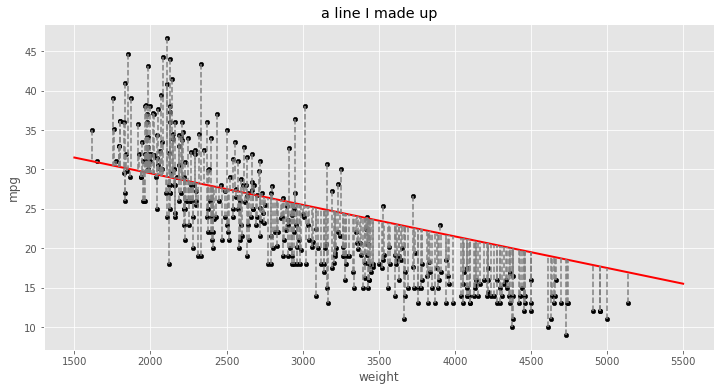

In [7]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(X,y, color='k', s=20)
ax.set_xlabel('weight'), ax.set_ylabel('mpg'), ax.set_title("a line I made up") 

b0, b1 = (1500/200) + 30 , (-1/250)
line1 = b0 + b1*xx
ax.plot(xx, line1, color='r', lw=2)

for x_i, y_i in zip(X,y):
    ax.plot([x_i, x_i], [y_i, b1*x_i+b0], color='gray', linestyle='dashed')
resids = y - (b0 + b1 * X); print("SSR for this line: {}".format((resids**2).sum()))

#### It turns out that the line that minimizes the SSR in the single feature case is:

$$ \hat{\beta}_1 = \frac{\sum_{i=1}^N (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^N (x_i - \bar{x})^2} = \frac{Cov(x,y)}{Var(x)}$$

$$\beta_0 = \bar{y} - \hat{\beta}_1\bar{x}$$

The traditional way to do inferential regression in Python is to use the `statsmodels` module, which is patterned after R


Let's do a linear regression using `statsmodels` and the `insects` dataset


In [8]:
import statsmodels.formula.api as smf

In [9]:
filename = 'insects.csv'

filepath = os.path.join(path, filename)
insects = pd.read_csv(filepath, header=1, sep='\s+') #there is a header row that we need to completely skip
insects.head()

,continent,latitude,wingsize,sex
0,1,35.5,901,0
1,1,37.0,896,0
2,1,38.6,906,0
3,1,40.7,907,0
4,1,40.9,898,0


We've got our four columns `continent`, `latitude`, `wingsize`, and `sex`.
Let's graph using pairplots

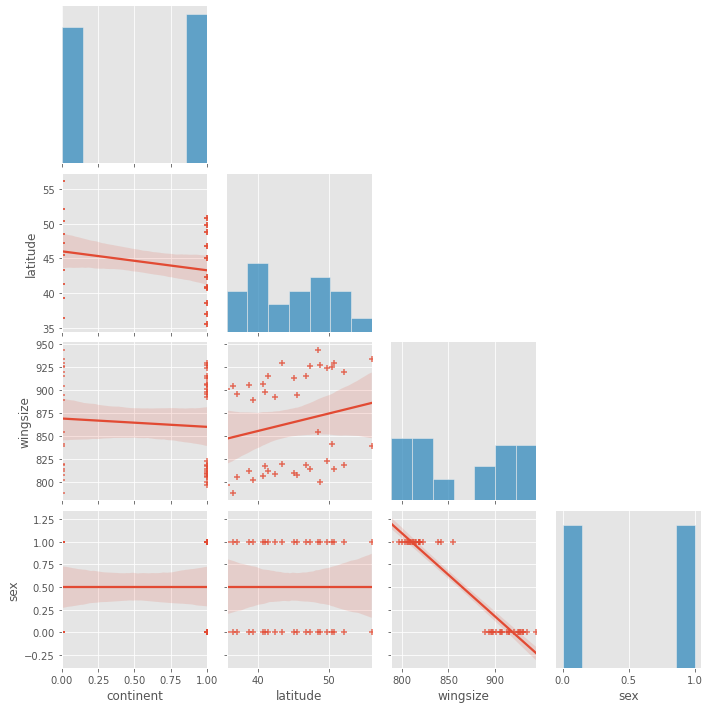

In [10]:
import seaborn as sns
sns.pairplot(insects, kind='reg', markers='+', corner=True);

## Check for Understanding

The pairplot shows that this dataset has a mix of continuous and categorical data!

* What are the continuous columns in the dataset?
* What are the categorical columns in the dataset?
* Which columns can we use as the target for our linear regression?
* Which columns can we use as the features for our linear regression?

After inspection of the pairplots, the only plots that look linear are the ones with `wingsize` and `latitude`. 

So, let's make a linear model using `latitude` where the insects were found to predict and make inferences about insect `wingsize`. 

### This is our new research question: 
### Is An Increasing Latitude Associated With an Increasing Wing Size?

To answer this question we need to create an linear model just like we did before:

$$ \hat{Wing Span} \approx \beta_0 + \beta_1 \times \text{Latitude} $$

Then we can look at the estimated coefficient $\beta_1$, which tells us how we should expect `wingspan` to change as `latitude` changes.  
If we find that $\beta_1 > 0$, that's evidence that an increasing latitude is associated with an increasing wingspan.

Statsmodels needs an argument called `formula` to interpret what you want to model.

* Formula is always a string
    * The name of your `target` column is always first. 
    * Then the `~` symbol. 
    * Then the name of your `feature` column (if more than one feature, separate them with `+` signs. 

Note: Statsmodels gives you the intercept for free, you don't have to include it in your formula

In [11]:
formula = 'wingsize ~ latitude'


insect_model_1 = smf.ols(formula=formula, data=insects).fit() #ols stands for 'ordinary least squares'
# The fitted model object automatically computes the parameters
insect_model_1.params

Intercept    780.531729
latitude       1.883231
dtype: float64

The linear regression has attempted to estimate the equation we are after, and it has returned:

$$ \text{Wing Size} \approx 780.53 + 1.88 \times \text{Latitude} $$

So we can expect an on average increase of $1.88$ wingspan for every increase in one latitude.

$$ \text{Wing Size} \approx \underbrace{780.53}_{\text{Intercept Estimate}} + \underbrace{1.88}_{\text{Slope Estimate}} \times \text{Latitude} $$


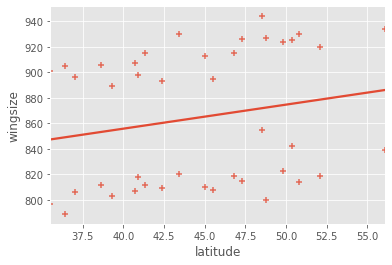

In [12]:
# The red line is the model! Not very good, is it?
# The answer to our research question "Is An Increasing Latitude Associated With an Increasing Wing Size?" is uncertain.
sns.regplot(x='latitude', y='wingsize', data=insects, marker='+', ci=None);

In [13]:
insect_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               wingsize   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     1.721
Date:                Fri, 16 Jul 2021   Prob (F-statistic):              0.197
Time:                        20:24:54   Log-Likelihood:                -224.38
No. Observations:                  42   AIC:                             452.8
Df Residuals:                      40   BIC:                             456.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    780.5317     64.526     12.096      0.000     650.120     910.943
latitude       1.8832      1.436      1.312      0.197      -1.018       4.785
==============================================================================
Omnibus:                      295.691   Durbin-Watson:                   0.176
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.916
Skew:                          -0.008   Prob(JB):                       0.0519
Kurtosis:                       1.161   Cond. No.                         363.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

So our statsmodel `insect_model_1` contains summary data that will tell us how SURE we are about our model. 

    * This information is NOT present in sklearn.linear_model.LinearRegression.

If you look at the p-value of the `latitude` coefficient, it is 0.197

    *  p value is > 0.10, so the coefficient is not significant at the 10% level.

You can see that we are not really that sure of anything with this model!

Note: We'll talk about some of the other output shown above later, but not all of it. Don't worry!

## Multiple Regression

### Let's draw another scatterplot for a hint as to why our previous model results are so awful.
### We can see from this second graph that the two sexes of insects each make their OWN line. Whereas our model just drew a single line right down the middle of the data.

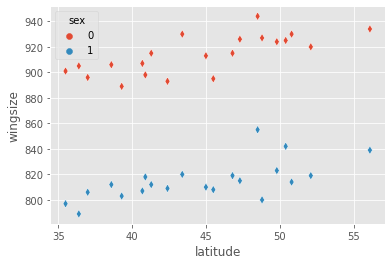

In [14]:
sns.scatterplot(x='latitude', y='wingsize', data=insects, marker='d', hue='sex');

### The previous graph leads us to *different* research question:

"Is an increasing latitude associated with an increasing wing size once we take sex of the insects into account?"

To answer that question, we need to do Multiple Regression


## What about multiple features?

Assume we have $p$ features.

Then the linear relationship we are assuming has the form
$$ y = \beta_0*1 + \beta_1* X_1 + \beta_2*X_2 + ... + \beta_p *X_p $$

which we can write as the matrix product
$$Y = X\beta$$
where $Y$ is an $n \times 1$ column vector, $X$ is an $n \times (p+1)$ feature matrix (we've added a column of ones to encode the intercept term), and $\beta$ is a $(p+1) \times 1$ column vector

Let's make a second model. This time we want to also include sex as a feature.

This model will make two parallel lines that have the same slope but different intercepts

Recall `sex` is a categorical feature. 

Statsmodels requires a special notation for categorical figures in the formula string: `C(sex)`. 

We just add them using `+` on the RHS of the `~`.

In [15]:
formula = 'wingsize ~ latitude + C(sex)'

insect_model_2 = smf.ols(formula=formula, data=insects).fit()
# The fitted model object automatically computes the three parameters, the intercept and two coefficients.
insect_model_2.params

Intercept      829.960301
C(sex)[T.1]    -98.857143
latitude         1.883231
dtype: float64

This output says when `sex` is 1, the intercept DECREASES by 98.86 points.
If we graph this prediction line it will actually plot TWO parallel lines with different y intercepts!

### Check for Understanding
    * Why will this model plot two parallel lines with different intercepts depending on sex?

In [16]:
insect_model_2.params

Intercept      829.960301
C(sex)[T.1]    -98.857143
latitude         1.883231
dtype: float64

In [17]:
#let's just make a convenience function for plotting the predictions for the two different sexes
def make_insect_model_lines(ax):
    x = np.linspace(30, 60, num=250)
    ax.plot(x, insect_model_2.params[0] 
                 + insect_model_2.params[2] * x + insect_model_2.params[2],
           linewidth=2, c="red", label='female')
    ax.plot(x, insect_model_2.params[0] + insect_model_2.params[1] + insect_model_2.params[2] * x,
           linewidth=2, c="blue", label='male')
    
    ax.set_xlim(30, 60)
    ax.set_ylim(700, 1000)
    ax.set_xlabel("Latitude")
    ax.set_ylabel("Wing Size")
    ax.set_title("Insect Wing Sizes at Various Latitudes")
    ax.legend()
    return ax

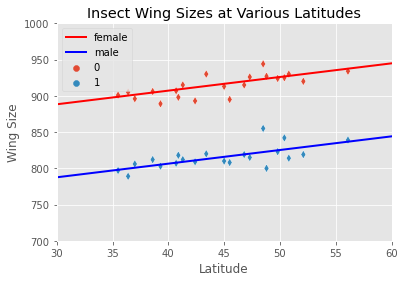

In [18]:
_, ax = plt.subplots()
sns.scatterplot(x='latitude', y='wingsize', data=insects, marker='d', hue='sex', ax=ax)
make_insect_model_lines(ax);

So our answer to the question:

"Is an increasing latitude associated with an increasing wing size once we take sex of the insects into account?" appears to be yes! 

In [19]:
insect_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               wingsize   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     434.6
Date:                Fri, 16 Jul 2021   Prob (F-statistic):           2.19e-27
Time:                        20:24:55   Log-Likelihood:                -159.16
No. Observations:                  42   AIC:                             324.3
Df Residuals:                      39   BIC:                             329.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     829.9603     13.935     59.558      0.000     801.773     858.147
C(sex)[T.1]   -98.8571      3.428    -28.841      0.000    -105.790     -91.924
latitude        1.8832      0.308      6.121      0.000       1.261       2.506
==============================================================================
Omnibus:                        4.668   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                3.601
Skew:                           0.466   Prob(JB):                        0.165
Kurtosis:                       4.090   Cond. No.                         366.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Recall that a **p-value** describes the amount of surprise that we feel when observing data, given that we are taking a skeptical stance on how that data is generated.

$$ P(\text{Observing A Statistic Equal or More Extreme than Actual} \mid H_0) $$

So to make sense of the p-values here, we need to describe the **null hypothesis** and the **statistic**.

The **null hypothesis** in this case is that each value of $y$ was generated by sampling from a relationship like:

$$ y \sim N(\beta_0 + \beta_1 \times \text{Latitude} +  \beta_2 \times \text{Sex}, \sigma) $$

Given this null hypothesis, the **p-value** reported in linear regression is

$$ P(\text{Observe a Parameter Estimate for Continent More Extreme Than the Fit Model} \mid H_0) $$

The p values for the latitude and sex coefficients are significant at the 1% level, and the F statistic for the model as a whole is also significant at the 1% level.

    * So latitude and sex together can account for the variance in wingsize for these insects.

Note: The simplistic R-squared metric shows the model can account for a large amount of the variation. (We'll talk more about R-squared in a bit.)

This is the first example we've encountered of **inferential vs. predictive statistics**:

- **Inferential Statistics** views the role of the model as a **summary of the data**.  We can then ask it questions like "is knowing the `continent` useful for producing an accurate summary of the data"?

- **Predictive Statistics** views the role of the model as a tool for **making predictions**.  We can ask the model questions like "What would I expect the value of `wingspan` to be for a value of `latitude` I have not yet observed"?

These are clearly related.  In the authors opinion, a model must be useful for making predictions to be meaningful for inference.

## # Check for Understanding  - Multiple Regression
    Using filename = 'admissions.csv'
    and filepath = './data'
    
    * Use pandas to load the admissions file into a dataframe called *admissions*
    * Make a linear regression model with 'gpa' as the target and 'gre' and 'rank' as features
    * What are the model coefficients?
    

### $R^2$ : The "proportion of variance explained"

Let's return to talking about our simplistic measurement for goodness of fit, R-squared. 

We said that R-squared existed, and we showed you how to use it, but we never showed you its calculation or dived into its meaning.

* R-squared evaluates the scatter of the data points around the fitted regression line. It is also called the coefficient of determination, or the coefficient of multiple determination for multiple regression. 

* For the same data set, higher R-squared values represent smaller differences between the observed data and the fitted values.


* R-squared is the percentage of the dependent variable variation that a linear model explains.

R-squared is usually between 0 and 100%, although `it can occassionally be negative` for truly horrible models.  

* 0% represents a model that does not explain any of the variation in the response variable around its mean. The mean of the dependent variable predicts the dependent variable as well as the regression model.

* 100% represents a model that explains all the variation in the response variable around its mean. Usually, the larger the R2, the better the regression model fits your observations.

Let's for a moment refer to the variance of $y$ as "the total sum of squares"
$$ SST = \sum_i^N (y_i - \bar{y})^2 $$

Then we define $R^2$ as the percentage of that variance that has been "captured" by the regression line
$$
\begin{align}
    R^2 &=  \frac{SSR}{SST} \\ \\
    &= \frac{\sum_{i=1}^n (\hat{y}_i - \bar{y})^2}{\sum_{i=1}^n (y_i - \bar{y})^2}
\end{align}    
$$

So that's the formula to calculate $R^{2}$

$R^{2}$ is usually between 0 and 100%. But what is a **good** $R^{2}$? It depends on exactly what you are modeling! 

This is something that professionals have differences of opinion about all the time. 

See, for example, https://www.researchgate.net/post/what_is_the_acceptable_r-squared_value

### Are Low R-squared Values Always a Problem?
No! Regression models with low R-squared values can be perfectly good models. Some fields of study have an inherently greater amount of unexplainable variation. In these areas, your R2 values are bound to be lower. 

For example, studies that try to explain human behavior generally have R2 values less than 50%. People are just harder to predict than things like physical processes.



Fortunately, if you have a low R-squared value but the independent variables are statistically significant, you can still draw important conclusions about the relationships between the variables.

source: https://statisticsbyjim.com/regression/interpret-r-squared-regression/

### Check for Understanding  - Multiple Regression
    * What is the r-squared value for the multiple linear regression model you made earlier?

## Summary: Predictive Linear Regression vs. Inferential Linear Regression

Sometimes it turns out we don't just want to make a prediction of new data we haven't seen given the data we have. We also might want to make **statistical claims** about this linear relationship. 

This is Inferential Linear Regression.


### What types of statistical claims might we want to make? 

Well, suppose we want some kind of a confidence interval around our predicted estimate? Or, more commonly, suppose we want a confidence interval around the value of some or all of our beta coefficients? That requires statistical inference, and also requires more assumptions than simple predictive regression.

In order to do that, we need to assume a distribution, so here we go.

$$ y = \beta X + \epsilon $$
where
$$ \epsilon \sim Normal(0, \sigma^2) $$

Equivalently, we can write
$$ y \sim Normal(\beta X, \sigma^2) $$

With some work, you can show the following:
 - Given a set of $N$ observations $\{(x_i, y_i)\}$, where $x_i$ is a $p$-dimensional vector, the maximum likelihood estimate for $\beta$ is the same as the least-squares estimate: $$\hat{\beta} = (X^TX)^{-1}X^Ty$$

Our model is $\hat{y} = \hat{\beta}X$
 - The sampling distribution of $\beta$ is: $$ \hat{\beta} \sim Normal(\beta, (X^T X)^{-1}\sigma^2)$$

Under this formulation, all our null hypotheses have the form "Does $\beta_i = 0$ ?"



###### References:
- [ISLR 3.1.2](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Sixth%20Printing.pdf)
- [here](http://www.stat.cmu.edu/~hseltman/309/Book/chapter9.pdf)

# APPENDIX

## What does regression look like in more than one dimension?

Let's plot `mpg` against `weight` and `acceleration`

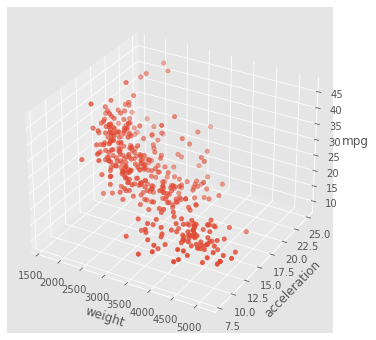

In [21]:
# 3D Plot - Two Features (weight and acceleration) and One Target (mpg)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
%matplotlib inline
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cars['weight'], cars['acceleration'], cars['mpg'])
ax.set_zlabel('mpg')
ax.set_xlabel('weight')
ax.set_ylabel('acceleration');

Linear regression then finds the **plane** that minimizes SSR.

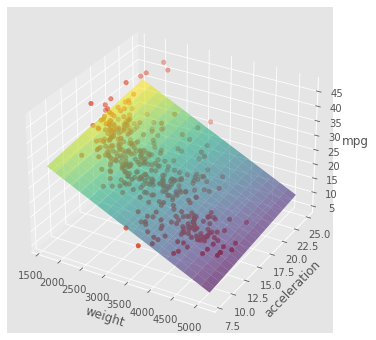

In [23]:
formula = 'mpg ~ weight + acceleration'
results = smf.ols(formula = formula, data=cars).fit()
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cars['weight'], cars['acceleration'], cars['mpg']);
ax.set_zlabel('mpg')
ax.set_xlabel('weight')
ax.set_ylabel('acceleration');

xx1 = np.linspace(cars['weight'].min(), cars['weight'].max(), 20)
xx2 = np.linspace(cars['acceleration'].min(), cars['acceleration'].max(), 20)
xx1, xx2 = np.meshgrid(xx1, xx2)
best_plane = (results.params['Intercept'] +
              results.params['weight']*xx1 +
              results.params['acceleration']*xx2)

# Plot the surface.
surf = ax.plot_surface(xx1, xx2, best_plane, color='k', alpha=.6, cmap='viridis')
